In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

df = X.join(pd.Series(y, name='class'))

In [174]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [59]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [35]:
df = X.join(pd.Series(y, name='class'))
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
    
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


9.884546449232964
2.903361061716055
8.328748314463861e-16
8.328748314463861e-16
4.886713002064387e-16
4.489875014453336e-16
3.4635722681863882e-16
3.4635722681863882e-16
1.0056538289828519e-16
7.842049664151311e-17
7.842049664151311e-17
5.900795033178523e-17
0.0
Explained Variance
Eigenvector 0: 0.7729604269322252
Eigenvector 1: 0.2270395730677747
Eigenvector 2: 6.51298760749777e-17
Eigenvector 3: 6.51298760749777e-17
Eigenvector 4: 3.821354664850663e-17
Eigenvector 5: 3.511031817057716e-17
Eigenvector 6: 2.7084746001023813e-17
Eigenvector 7: 2.7084746001023813e-17
Eigenvector 8: 7.864099956320532e-18
Eigenvector 9: 6.132394731066783e-18
Eigenvector 10: 6.132394731066783e-18
Eigenvector 11: 4.614355419857593e-18
Eigenvector 12: 0.0


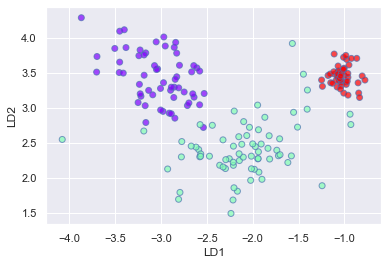

In [34]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).T)
        within_class_scatter_matrix += s

feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

X_lda = np.array(X.dot(w_matrix))

le = LabelEncoder()
y = le.fit_transform(df['class'])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Using Scikit learn

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

lda.explained_variance_ratio_

array([0.6875, 0.3125])

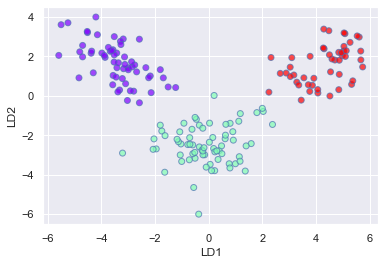

In [33]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Using with d13C-AA data

### Links

https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [8]:
df = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_larsen_in prog.csv', index_col = False)
df = df[['Category', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']]

train = ['Cyanobacteria','Microalgae','Macroalgae', 'Bacteria']
test = ['Leiopathes-post', 'Leiopathes-pre', 'Isidella']

df_train = df[df['Category'].isin(train)]
df_test = df[df['Category'].isin(test)]
df_all = pd.concat([df_train, df_test], axis=0)
# df_all = df_all[['Category', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']]

df_all

,Category,Phe,Thr,Ile,Leu,Val
0,Bacteria,-18.800000,-5.200000,-12.000000,-12.800000,-13.600000
1,Bacteria,-17.000000,-8.200000,-12.900000,-13.000000,-14.100000
2,Bacteria,-24.600000,-15.000000,-18.900000,-19.900000,-20.800000
3,Bacteria,-28.900000,-15.100000,-23.700000,-25.200000,-26.400000
34,Macroalgae,-19.200000,-6.400000,-17.300000,-20.200000,-19.200000
...,...,...,...,...,...,...
136,Leiopathes-pre,-20.357031,1.686869,-12.158030,-26.378636,-16.711833
137,Leiopathes-pre,-21.560859,-4.580303,-12.473273,-22.838000,-20.469200
138,Leiopathes-pre,-19.111016,-4.384091,-12.110909,-20.853273,-16.111000
139,Leiopathes-pre,-22.362500,-5.630303,-14.977455,-24.698545,-16.792400


In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

X = df_train.iloc[:, 1:6].values
y = df_train.iloc[:, 0].values

X_lda = lda.fit_transform(X, y)

lda.explained_variance_ratio_

array([0.5031, 0.384 , 0.1129])

In [199]:
le = LabelEncoder()
y = le.fit_transform(df_train['Category'])

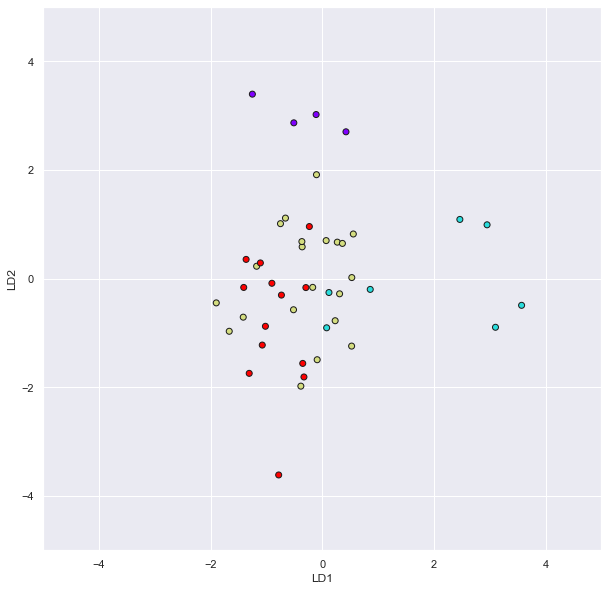

In [201]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c = y,
    cmap='rainbow',
#     alpha=0.7,
    edgecolors='k'
)

# ax.legend()

In [151]:
# Set train and test sets
X_train = df_train.iloc[:, 2:7].values
y_train = df_train.iloc[:, 1].values

X_test = df_test.iloc[:, 2:7].values
y_test = df_test.iloc[:, 1].values

In [154]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 0 0 0]
 [3 0 0 0 8 5]
 [0 0 0 0 4 0]
 [0 0 0 0 4 2]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Accuracy0.0


In [83]:
X = df_train.iloc[:, 1:6].values
y = df_train.iloc[:, 0].values

In [127]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Scaling
from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1 0 0 0]
 [0 3 2 0]
 [1 0 9 0]
 [0 0 7 0]]
Accuracy0.5652173913043478


In [72]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [73]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

df

,var,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [52]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_larsen_in prog.csv', index_col = False)
df = df[['Category', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']]

categories = ['Cyanobacteria','Microalgae','Macroalgae', 'Bacteria'
#              'Leiopathes-post', 'Leiopathes-pre', 'Isidella'
             ]
df = df[df['Category'].isin(categories)]


features = ['Phe', 'Thr', 'Ile', 'Leu', 'Val']
x = df.loc[:, features].values
x = StandardScaler(with_std=True, with_mean=True).fit_transform(x)
y = df.loc[:,['Category']].values

xy = np.concatenate((y,x),axis=1)
xydf = pd.DataFrame(
                   {'class': xy[:, 0], 'phe': xy[:, 1],
                   'thr': xy[:, 2], 'ile': xy[:, 3],
                   'leu': xy[:, 4], 'val': xy[:, 5]})

xydf

,class,phe,thr,ile,leu,val
0,Bacteria,0.544806,0.401769,0.93765,1.75317,1.28997
1,Bacteria,0.915471,-0.0313882,0.795405,1.71866,1.20047
2,Bacteria,-0.649559,-1.01321,-0.152896,0.528127,0.0011674
3,Bacteria,-1.53504,-1.02765,-0.911538,-0.386343,-1.00124
4,Macroalgae,0.462436,0.228506,0.099984,0.476365,0.287569
5,Macroalgae,0.153548,0.459523,0.40028,0.597144,-0.088333
6,Macroalgae,-0.793707,-0.175774,-0.595437,-0.489868,-0.822236
7,Macroalgae,-0.464227,-0.435668,0.147399,0.183044,0.180168
8,Macroalgae,-0.793707,-1.05653,-0.247727,0.0795191,-0.285234
9,Macroalgae,0.0711785,-0.103581,0.226424,0.338331,0.0190675


In [53]:
# print(df.reset_index())

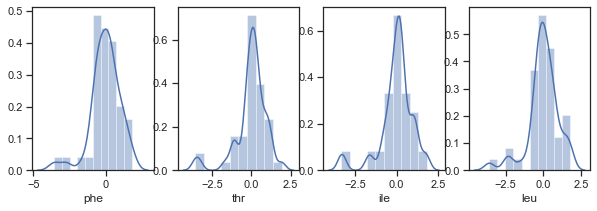

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(xydf["phe"],bins=10, ax= ax[0])
vis2 = sns.distplot(xydf["thr"],bins=10, ax=ax[1])
vis3 = sns.distplot(xydf["ile"],bins=10, ax= ax[2])
vis4 = sns.distplot(xydf["leu"],bins=10, ax=ax[3])
f.savefig('subplot.png')

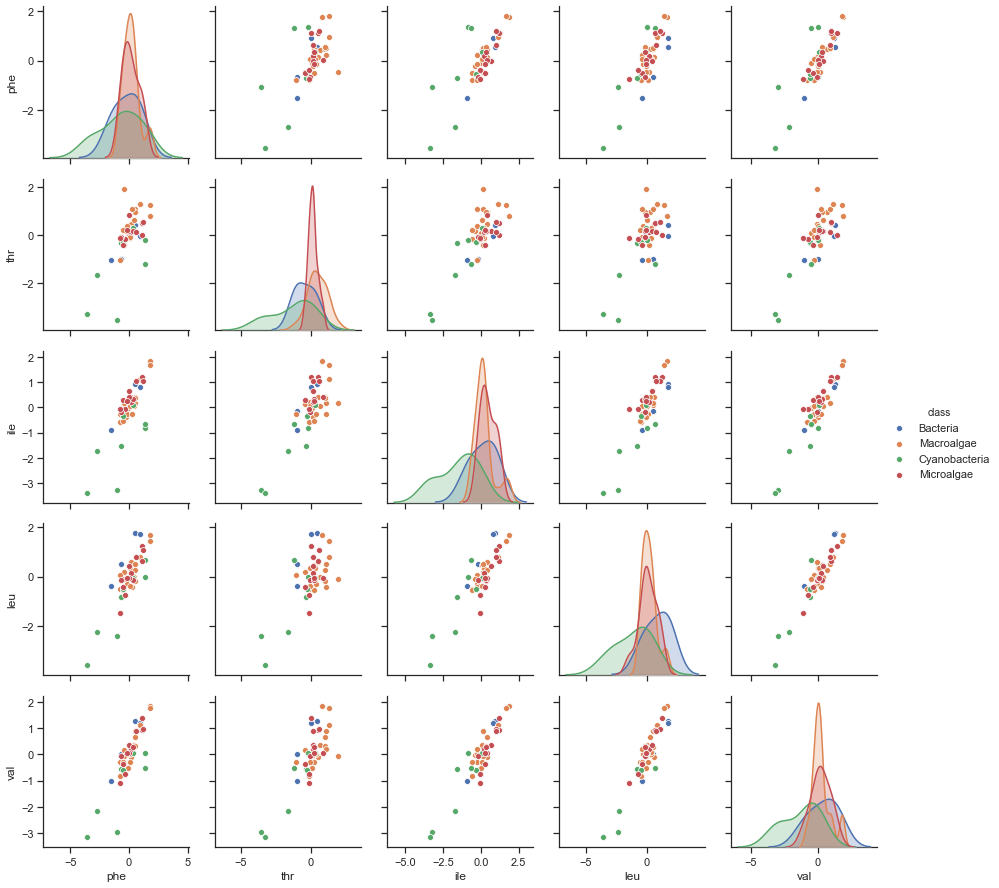

In [57]:
sns.pairplot(xydf, hue="class")